In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [78]:
#: Import metrics libraries
try:
    from skimage.metrics import peak_signal_noise_ratio as psnr
    from skimage.metrics import structural_similarity as ssim
    import matplotlib.patheffects as path_effects
    print("Successfully imported PSNR and SSIM from scikit-image.")
except ImportError:
    print("scikit-image not found. Installing...")
    !pip install scikit-image
    from skimage.metrics import peak_signal_noise_ratio as psnr
    from skimage.metrics import structural_similarity as ssim
    import matplotlib.patheffects as path_effects
    print("Installation complete. Imported metrics.")

Successfully imported PSNR and SSIM from scikit-image.


In [67]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

train_path = "/content/drive/MyDrive/Collab_Data/subset_data"
test_path = "/content/drive/MyDrive/Collab_Data/test"

train = []
for filename in os.listdir(train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(train_path, filename), target_size=(64, 64))
        train.append(image.img_to_array(img))
train = np.array(train)

test = []
for filename in os.listdir(test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(os.path.join(test_path, filename), target_size=(64, 64))
        test.append(image.img_to_array(img))
test = np.array(test)

train = train.astype('float32') / 255.
test = test.astype('float32') / 255.

In [68]:
print("cat_train", train.shape)
print("cat_test", test.shape)

cat_train (5000, 64, 64, 3)
cat_test (19, 64, 64, 3)


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def show_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))

    # Ensure n is not larger than the number of images in X
    n = min(n, len(X))

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        # CORRECTION: Just use plt.imshow(X[i])
        # It correctly handles float arrays in the [0, 1] range.
        plt.imshow(X[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize=20)


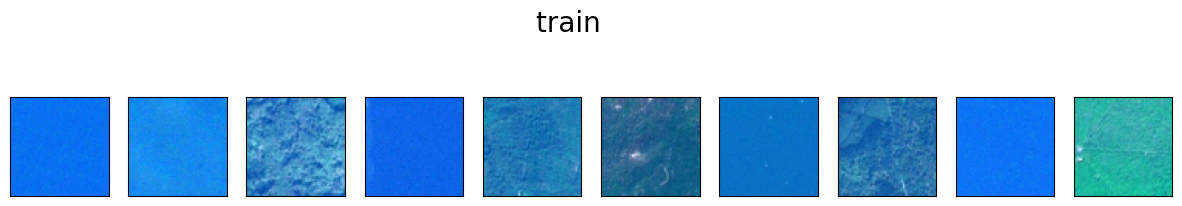

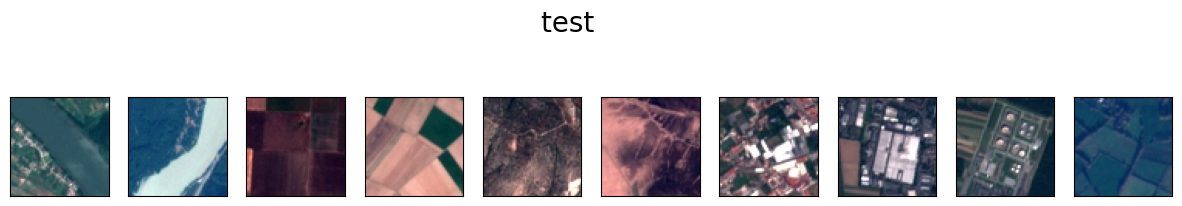

In [59]:
show_data(train, title="train ")
show_data(test, title="test ")

In [70]:
input_layer = Input(shape=(64, 64, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name="OUTPUT")(x)

In [71]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='mse')
AE.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CODE (MaxPooling2D)             │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 8, 8, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 16, 16, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 32, 32, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_17 (UpSampling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Conv2D)                 │ (None, 64, 64, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
AE.fit(train, train,
         epochs=100,
         batch_size=32,
         shuffle=True,
         validation_data=(test, test))

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0238 - val_loss: 0.0065
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━

In [74]:
# Get reconstructed images
reconstructed = AE.predict(test)
print(f"Reconstructed shape: {reconstructed.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Reconstructed shape: (19, 64, 64, 3)


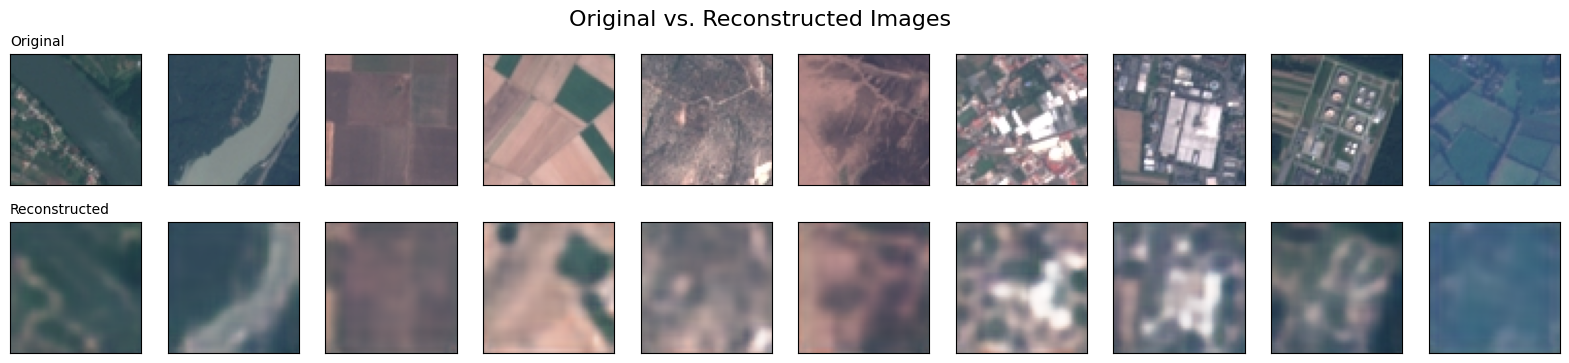

In [76]:
# Define a function to show original vs. reconstructed
def show_original_vs_reconstructed(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    # Ensure we don't try to plot more images than we have in the test set
    n = min(n, len(original))

    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original", loc='left', fontsize=10)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed", loc='left', fontsize=10)
    plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
    plt.show()

# Show the comparison
show_original_vs_reconstructed(test, reconstructed)

In [79]:
# Cell 10: Get Encoded/Latent Vectors
get_encoded = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)
encoded = get_encoded.predict(test)
print(f"Encoded (latent) shape: {encoded.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Encoded (latent) shape: (19, 8, 8, 8)


In [80]:
# Cell 11: Calculate Compression Ratio
original_img_shape = test[0].shape
encoded_img_shape = encoded[0].shape

# Calculate total number of values (pixels * channels)
original_size = np.prod(original_img_shape)
encoded_size = np.prod(encoded_img_shape)

# Calculate compression
compression_ratio = original_size / encoded_size

print(f"Original Image Size (pixels): {original_size} (shape: {original_img_shape})")
print(f"Latent Vector Size (values): {encoded_size} (shape: {encoded_img_shape})")
print(f"Compression Ratio: 1:{1/compression_ratio:.2f} (Original is {compression_ratio:.2f} times larger)")

# Create a text string for the plot
compression_text = f"Compression: {compression_ratio:.1f}x"

Original Image Size (pixels): 12288 (shape: (64, 64, 3))
Latent Vector Size (values): 512 (shape: (8, 8, 8))
Compression Ratio: 1:0.04 (Original is 24.00 times larger)


In [81]:
# Cell 12: Updated Visualization Function

# Define a text style for readability on the images
# This creates white text with a thin black border
text_style = dict(horizontalalignment='left', verticalalignment='bottom',
                  fontsize=10, color='white',
                  path_effects=[path_effects.withStroke(linewidth=2, foreground='black')])

def show_original_vs_reconstructed(original, reconstructed, compression_text, n=10):
    plt.figure(figsize=(20, 5))  # Made figure a bit taller for text
    n = min(n, len(original))

    for i in range(n):
        # --- Calculate Metrics ---
        # PSNR (Peak Signal-to-Noise Ratio) - Higher is better
        # data_range is 1.0 since we normalized images to [0, 1]
        psnr_val = psnr(original[i], reconstructed[i], data_range=1.0)

        # SSIM (Structural Similarity Index) - Higher is better (max 1.0)
        # channel_axis=-1 (or multichannel=True for older skimage) is for RGB images
        ssim_val = ssim(original[i], reconstructed[i], channel_axis=-1, data_range=1.0)

        # --- Display Original ---
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original", loc='left', fontsize=10)
        # Add compression text to the original image
        ax.text(0.03, 0.03, compression_text, transform=ax.transAxes, **text_style)

        # --- Display Reconstruction ---
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed", loc='left', fontsize=10)
        # Add metrics text to the reconstructed image
        metrics_text = f"PSNR: {psnr_val:.2f}\nSSIM: {ssim_val:.3f}"
        ax.text(0.03, 0.03, metrics_text, transform=ax.transAxes, **text_style)

    plt.suptitle("Original vs. Reconstructed Images (with Metrics)", fontsize=16)
    plt.show()

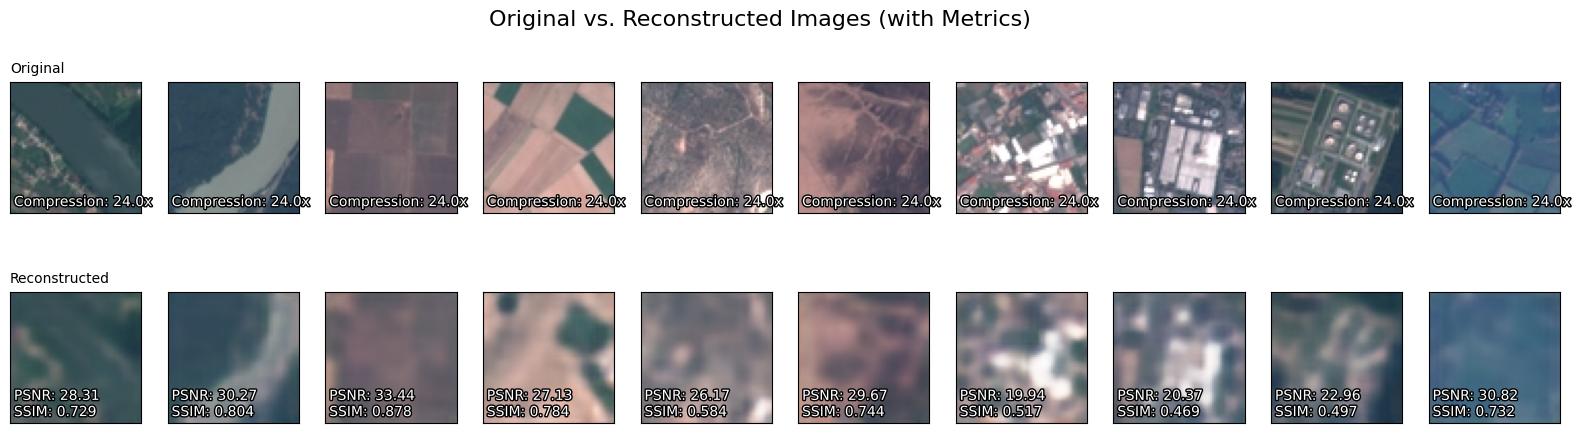

In [82]:
# Cell 13: Run the Visualization
# (Make sure you have run Cell 9 to get the 'reconstructed' variable)
show_original_vs_reconstructed(test, reconstructed, compression_text)